In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
weather = pd.read_csv('weather.csv')

In [15]:
print(races.shape)
races.head()

(1018, 8)


,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [16]:
print(results.shape)
results.head()

(24167, 13)


,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


In [17]:
print(qualifying.shape)
qualifying.rename(columns = {'grid_position': 'grid'}, inplace = True)
qualifying.head()

(14559, 6)


,grid,driver_name,car,qualifying_time,season,round
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1


In [8]:
races.head()

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [18]:
driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'] ,axis = 1, inplace = True)

print(driver_standings.shape)
driver_standings.head()

(26264, 6)


,season,round,driver,driver_points,driver_wins,driver_standings_pos
0,1950,1,farina,0.0,0.0,0.0
1,1950,1,fagioli,0.0,0.0,0.0
2,1950,1,reg_parnell,0.0,0.0,0.0
3,1950,1,cabantous,0.0,0.0,0.0
4,1950,1,rosier,0.0,0.0,0.0


In [19]:
constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],axis = 1, inplace = True)

print(constructor_standings.shape)
constructor_standings.head()

(12316, 6)


,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,0.0,0.0,0.0
1,1958,1,ferrari,0.0,0.0,0.0
2,1958,1,maserati,0.0,0.0,0.0
3,1958,2,cooper,8.0,1.0,1.0
4,1958,2,ferrari,6.0,0.0,2.0


In [20]:
print(weather.shape)
weather.head()

(1018, 9)


,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, Mild, Dry",0,0,1,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


In [21]:
df1 = pd.merge(races, weather, how='inner', on=['season', 'round', 'circuit_id']).drop(['lat', 'long','country','weather'], axis = 1)
df2 = pd.merge(df1, results, how='inner', on=['season', 'round', 'circuit_id', 'url']).drop(['url','points', 'status', 'time'], axis = 1)

df3 = pd.merge(df2, driver_standings, how='left', on=['season', 'round', 'driver']) 
df4 = pd.merge(df3, constructor_standings, how='left', on=['season', 'round', 'constructor']) #from 1958

final_df = pd.merge(df4, qualifying, how='inner', on=['season', 'round', 'grid']).drop(['driver_name', 'car'], axis = 1) #from 1983

In [22]:
final_df.head()

,season,round,circuit_id,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,...,constructor,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time
0,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,piquet,...,brabham,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1:35.114
1,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,lauda,...,mclaren,9,2,0.0,0.0,0.0,0.0,0.0,0.0,1:36.054
2,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,laffite,...,williams,18,3,0.0,0.0,0.0,0.0,0.0,0.0,1:38.234
3,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,tambay,...,ferrari,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1:34.758
4,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,surer,...,arrows,20,5,0.0,0.0,0.0,0.0,0.0,0.0,1:38.468


In [23]:
# calculate age of drivers

from dateutil.relativedelta import *

final_df['date'] = pd.to_datetime(final_df.date)
final_df['date_of_birth'] = pd.to_datetime(final_df.date_of_birth)
final_df['driver_age'] = final_df.apply(lambda x: relativedelta(x['date'], x['date_of_birth']).years, axis=1)
final_df.drop(['date', 'date_of_birth'], axis = 1, inplace = True)

In [24]:
for col in ['driver_points', 'driver_wins', 'driver_standings_pos', 'constructor_points', 
            'constructor_wins' , 'constructor_standings_pos']:
    final_df[col].fillna(0, inplace = True)
    final_df[col] = final_df[col].map(lambda x: int(x))
    
final_df.dropna(inplace = True )

In [25]:
for col in ['weather_warm', 'weather_cold','weather_dry', 'weather_wet', 'weather_cloudy']:
    final_df[col] = final_df[col].map(lambda x: bool(x))

In [26]:
final_df['qualifying_time'] = final_df.qualifying_time.map(lambda x: 0 if str(x) == '00.000' 
                             else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if x != 0 else 0))
final_df = final_df[final_df['qualifying_time'] != 0]
final_df.sort_values(['season', 'round', 'grid'], inplace = True)
final_df['qualifying_time_diff'] = final_df.groupby(['season', 'round']).qualifying_time.diff()
final_df['qualifying_time'] = final_df.groupby(['season', 'round']).qualifying_time_diff.cumsum().fillna(0)
final_df.drop('qualifying_time_diff', axis = 1, inplace = True)

In [27]:
df_dum = pd.get_dummies(final_df, columns = ['circuit_id', 'nationality', 'constructor'] )

for col in df_dum.columns:
    if 'nationality' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'constructor' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'circuit_id' in col and df_dum[col].sum() < 70:
        df_dum.drop(col, axis = 1, inplace = True)
    
    else:
        pass

In [28]:
df_dum.shape

(13918, 98)

In [29]:
df_dum.to_csv('final_df.csv', index = False)

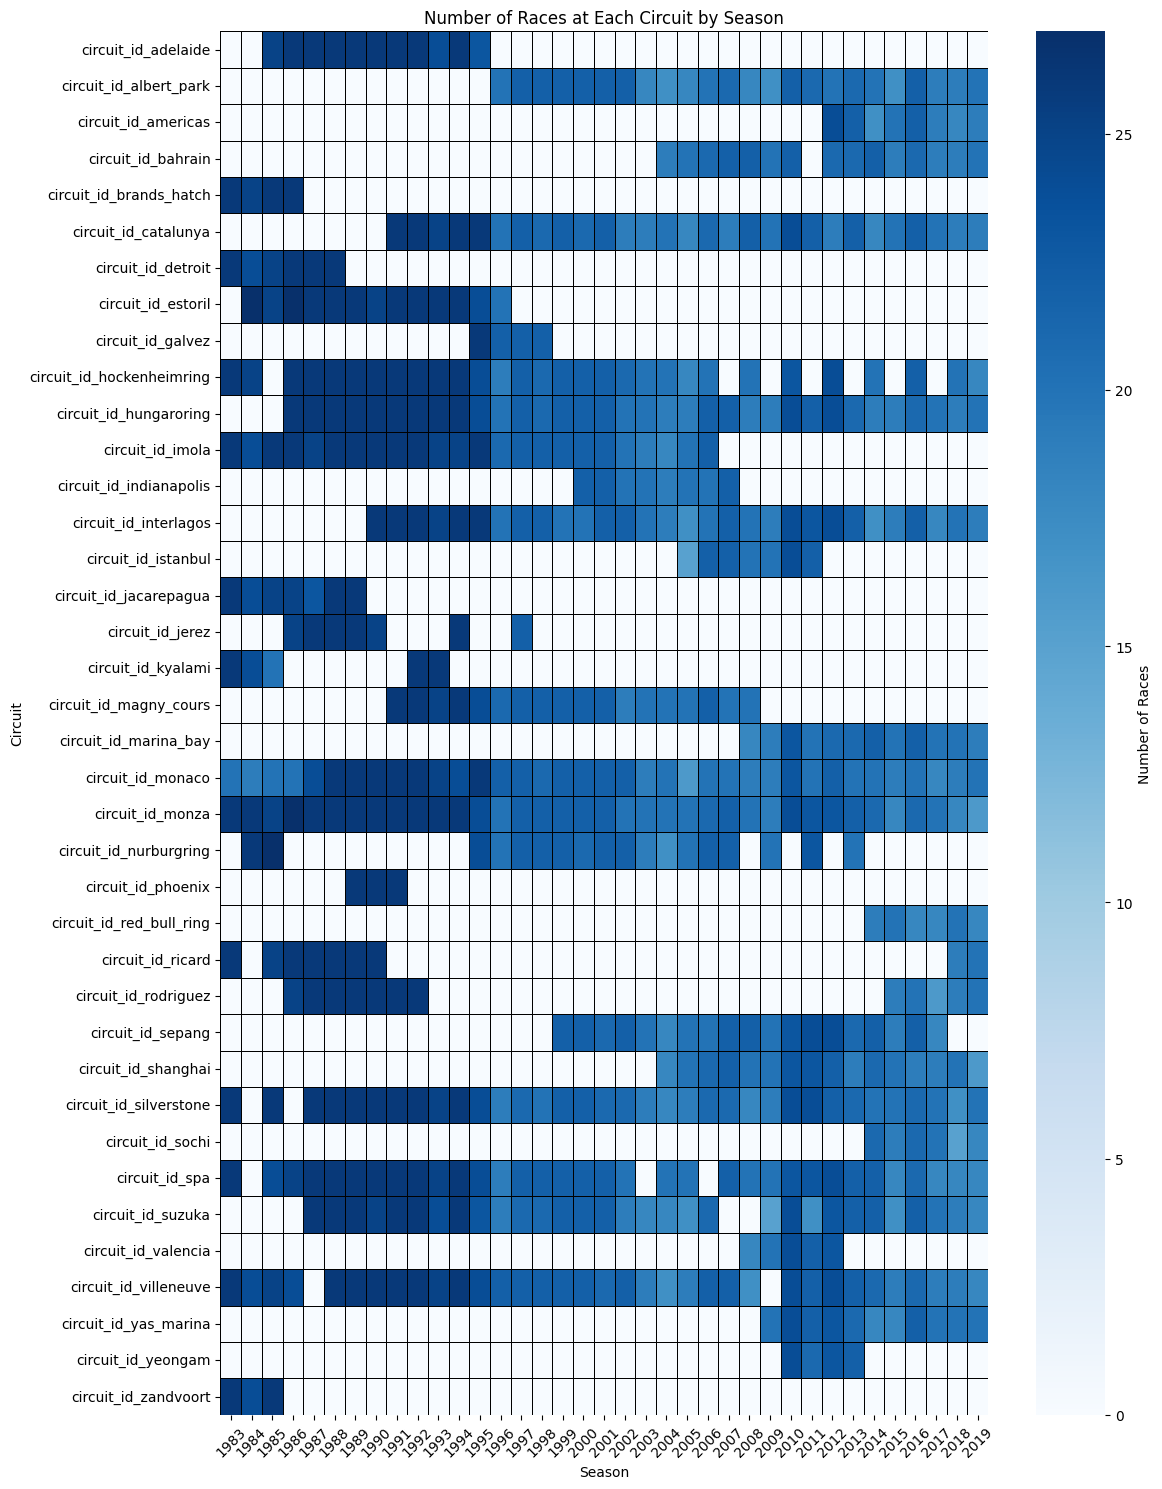

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
file_path = 'final_df.csv'  # Make sure to update the path
data = pd.read_csv(file_path)

# Grouping the data by circuit, season and counting the occurrences
circuit_season_counts = data.groupby(['season']).sum().reset_index()

# Dropping non-circuit columns
circuit_columns = [col for col in circuit_season_counts.columns if col.startswith('circuit_id')]
circuit_season_counts = circuit_season_counts[['season'] + circuit_columns]

# Melting the data to have a long-form dataframe
circuit_season_counts_melted = circuit_season_counts.melt(id_vars='season', var_name='circuit', value_name='count')

# Pivoting the data to have circuits as rows and seasons as columns
heatmap_data = circuit_season_counts_melted.pivot_table(values='count', index='circuit', columns='season')

# Plotting the heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(heatmap_data, cmap='Blues', linewidths=.5, linecolor='black', cbar_kws={'label': 'Number of Races'})
plt.title('Number of Races at Each Circuit by Season')
plt.xlabel('Season')
plt.ylabel('Circuit')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [40]:
circuit_names = [
    'Baku',
    'Adelaide',
    'Melbourne',
    'Austin',
    'Sakhir',
    'West Kingsdown',
    'Montmeló',
    'Detroit',
    'Estoril',
    'Buenos Aires',
    'Spielberg',
    'Aintree',
    'Casablanca',
    'Anderstorp',
    'Berlin',
    'Greater Noida',
    'Mexico City',
    'Prenois',
    'Castle Donington',
    'Oyama',
    'Hockenheim',
    'Mogyoród',
    'Imola',
    'Speedway',
    'Istanbul',
    'Rio de Janeiro',
    'San Sebastián de los Reyes',
    'Jerez de la Frontera',
    'Midrand',
    'Las Vegas',
    'Le Mans',
    'Marina Bay',
    'Lisbon',
    'Mont-Tremblant',
    'Barcelona',
    'Monza',
    'Bowmanville',
    'Nivelles',
    'Nürburg',
    'Mimasaka',
    'Le Castellet',
    'Barcelona',
    'Pescara',
    'Phoenix',
    'Gueux',
    'Riverside',
    'Rouen',
    'Sebring',
    'Shanghai',
    'Silverstone',
    'Sochi',
    'Suzuka',
    'Valencia',
    'Watkins Glen',
    'Yas Island',
    'Yeongam',
    'Zandvoort',
    'Zeltweg',
    'Heusden-Zolder'
]


In [41]:
# %pip install folium
# %pip install geopy
import folium
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def get_circuit_location(circuit_name):
    try:
        geolocator = Nominatim(user_agent="my_geocoder")
        location = geolocator.geocode(circuit_name)
        return location
    except GeocoderTimedOut:
        print(f"Error: geocode failed on input {circuit_name} with message timed out.")
        return None

# Creating a new map
map = folium.Map()


for circuit in circuit_names:
    location = get_circuit_location(circuit)
    if location:
        folium.Marker([location.latitude, location.longitude], popup=circuit).add_to(map)
    else:
        print(f"Could not find location for circuit: {circuit}")
# Save the map to an HTML file
map.save('grand_prix_locations.html')

# Display the map
map


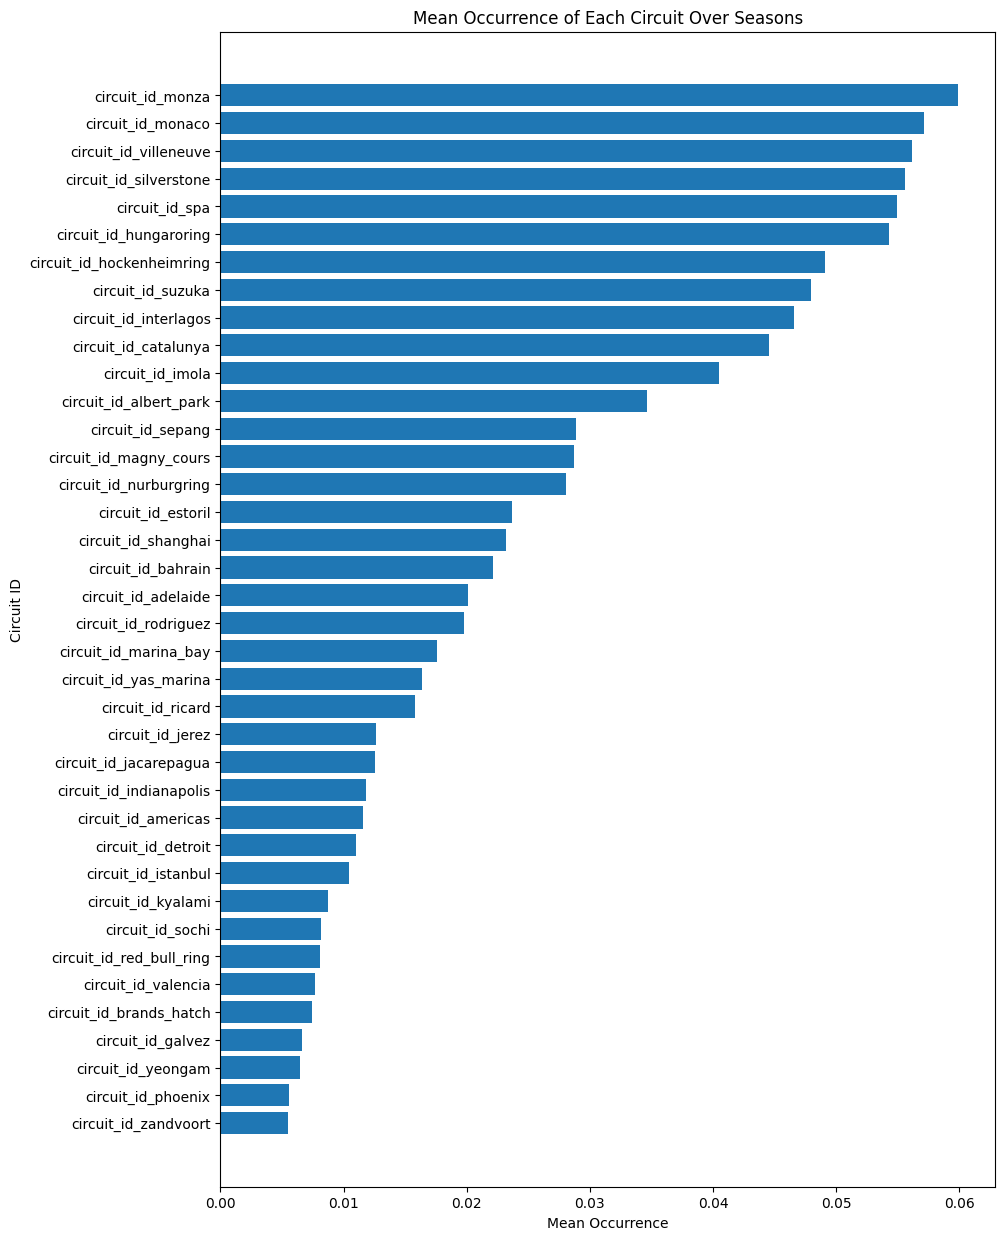

In [42]:
# Calculate mean occurrence of each circuit over the seasons
mean_occurrences = data[circuit_columns].mean(axis=0)

# Sort the values in descending order
mean_occurrences = mean_occurrences.sort_values(ascending=False)

# Creating a bar chart
plt.figure(figsize=(10, 15))
plt.barh(mean_occurrences.index, mean_occurrences.values)
plt.xlabel('Mean Occurrence')
plt.ylabel('Circuit ID')
plt.title('Mean Occurrence of Each Circuit Over Seasons')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()


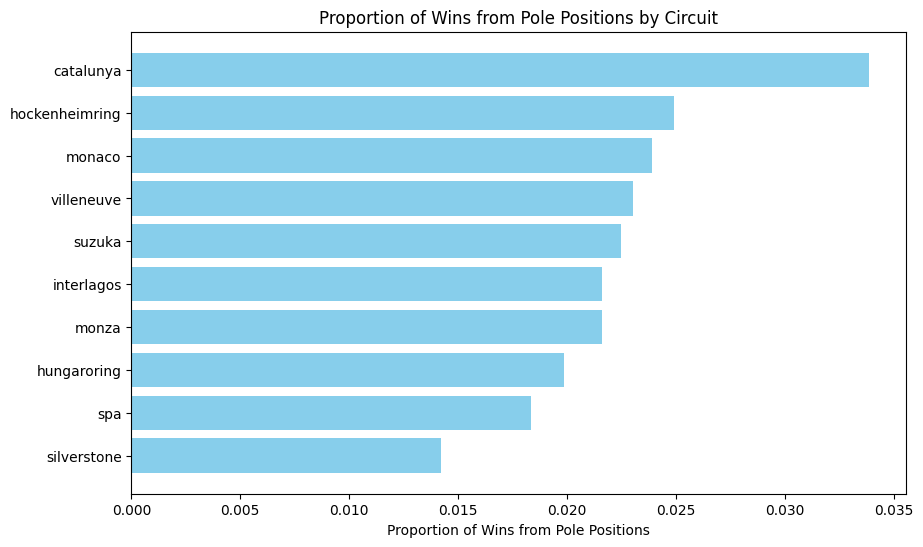

In [43]:
# Load your data
data = pd.read_csv('final_df.csv')  

# Identifying the top 10 most popular circuits
circuit_columns = [col for col in data.columns if col.startswith('circuit_id')]
total_occurrences = data[circuit_columns].sum(axis=0)
top_10_circuits = total_occurrences.sort_values(ascending=False).head(10)

# Calculating the proportion of wins from pole positions for each of the top 10 circuits
proportions = {}
for circuit in top_10_circuits.index:
    circuit_data = data[data[circuit] == 1]
    wins_from_pole = len(circuit_data[(circuit_data['grid'] == 1) & (circuit_data['podium'] == 1)])
    total_races = len(circuit_data)
    proportions[circuit.replace('circuit_id_', '')] = wins_from_pole / total_races if total_races != 0 else 0

# Sorting the circuits by proportions for better visualization
sorted_proportions = {k: v for k, v in sorted(proportions.items(), key=lambda item: item[1], reverse=True)}

# Creating a bar chart to visualize the proportions
plt.figure(figsize=(10, 6))
plt.barh(list(sorted_proportions.keys()), list(sorted_proportions.values()), color='skyblue')
plt.xlabel('Proportion of Wins from Pole Positions')
plt.title('Proportion of Wins from Pole Positions by Circuit')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest values at the top
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
status_data = pd.read_csv('data/status.csv')  
results_data = pd.read_csv('data/results.csv')
circuits_data = pd.read_csv('data/circuits.csv')


In [48]:
circuits_data.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [50]:
results_data.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [53]:
import pandas as pd

# Load the datasets
circuits_data = pd.read_csv('data/circuits.csv')
results_data = pd.read_csv('data/results.csv')
status_data = pd.read_csv('data/status.csv')
races_data = pd.read_csv('data/races.csv')
constructors_data = pd.read_csv('data/constructors.csv')
drivers_data = pd.read_csv('data/drivers.csv')

# Merging the datasets step by step
merged_data = results_data.merge(status_data, on='statusId', how='left')
merged_data = merged_data.merge(races_data, on='raceId', how='left')
merged_data = merged_data.merge(circuits_data, left_on='circuitId', right_on='circuitId', how='left', suffixes=('_race', '_circuit'))
merged_data = merged_data.merge(constructors_data, on='constructorId', how='left')
merged_data = merged_data.merge(drivers_data, left_on='driverId', right_on='driverId', how='left', suffixes=('_constructor', '_driver'))

# Save the merged dataset as a CSV file
merged_data.to_csv('data/merged_dataset.csv', index=False)


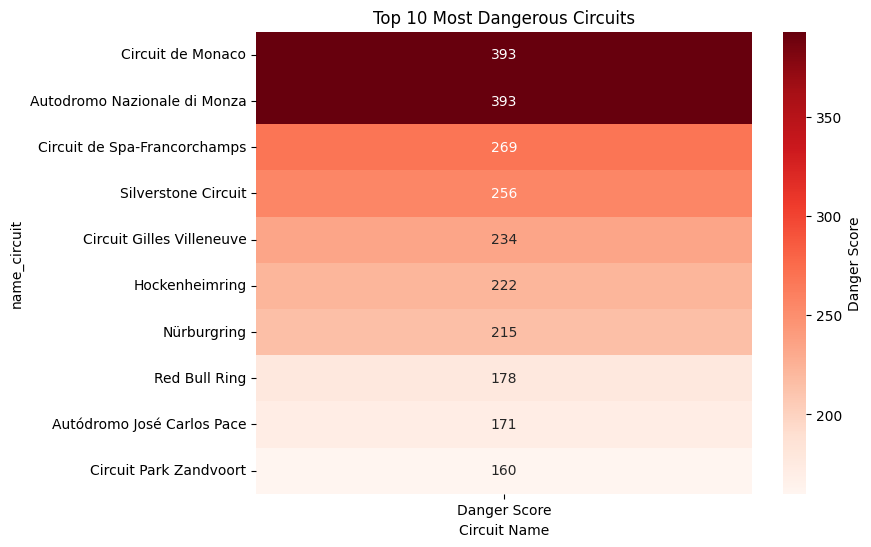

In [54]:

import matplotlib.pyplot as plt
import seaborn as sns

# Define dangerous statuses
dangerous_statuses = ['Retired', 'Collision', 'Accident', 'Disqualified', 'Engine', 'Gearbox', 'Transmission']

# Filter data for dangerous statuses and group by circuit name
danger_scores_by_circuit = merged_data[merged_data['status'].isin(dangerous_statuses)].groupby('name_circuit').size()

# Sort the danger scores in descending order
sorted_danger_scores = danger_scores_by_circuit.sort_values(ascending=False).head(10)

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(sorted_danger_scores, columns=['Danger Score']), annot=True, fmt="d", cmap='Reds', cbar_kws={'label': 'Danger Score'})
plt.title('Top 10 Most Dangerous Circuits')
plt.xlabel('Circuit Name')
plt.yticks(rotation=0)
plt.show()


/var/folders/lw/glss8t557pv__tkfgv16_7rm0000gn/T/ipykernel_77777/3238166466.py:2: DtypeWarning: Columns (4,42) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_dataset = pd.read_csv('data/merged_dataset.csv')


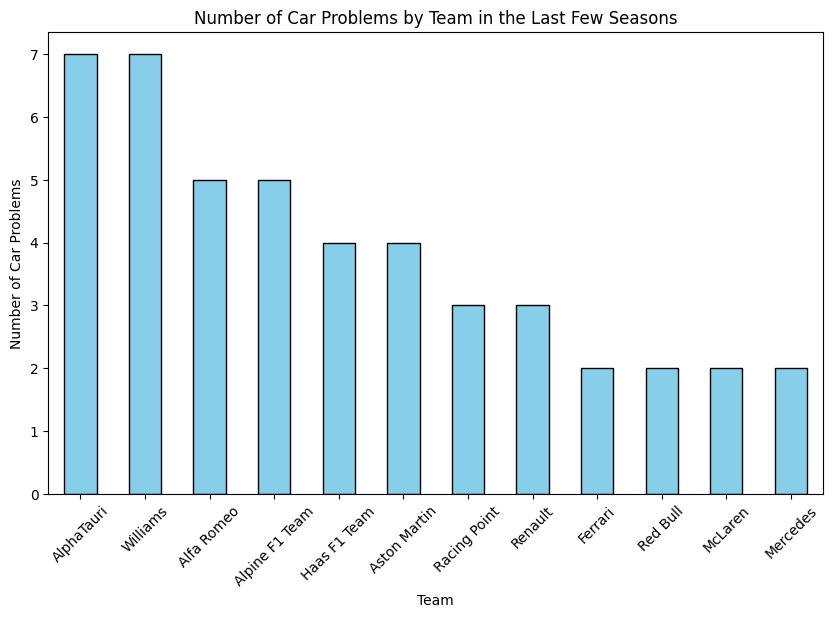

In [58]:
# Load the merged dataset
merged_dataset = pd.read_csv('data/merged_dataset.csv')

# Define car problem statuses
car_problems_statuses = ['Engine', 'Gearbox', 'Transmission', 'Brakes', 'Suspension']

# Filtering data for recent seasons and specific statuses, then grouping by constructor name
recent_seasons_data = merged_dataset[merged_dataset['year'] >= 2020]
car_problems_data = recent_seasons_data[recent_seasons_data['status'].isin(car_problems_statuses)]
car_problems_by_constructor = car_problems_data['name'].value_counts()

# Creating the bar chart
plt.figure(figsize=(10, 6))
car_problems_by_constructor.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Car Problems by Team in the Last Few Seasons')
plt.xlabel('Team')
plt.ylabel('Number of Car Problems')
plt.xticks(rotation=45)
plt.show()


/var/folders/lw/glss8t557pv__tkfgv16_7rm0000gn/T/ipykernel_77777/3179543919.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_drivers_data['date'] = pd.to_datetime(winning_drivers_data['date'])
/var/folders/lw/glss8t557pv__tkfgv16_7rm0000gn/T/ipykernel_77777/3179543919.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winning_drivers_data['dob'] = pd.to_datetime(winning_drivers_data['dob'])
/var/folders/lw/glss8t557pv__tkfgv16_7rm0000gn/T/ipykernel_77777/3179543919.py:9: SettingWithCopyWarning: 

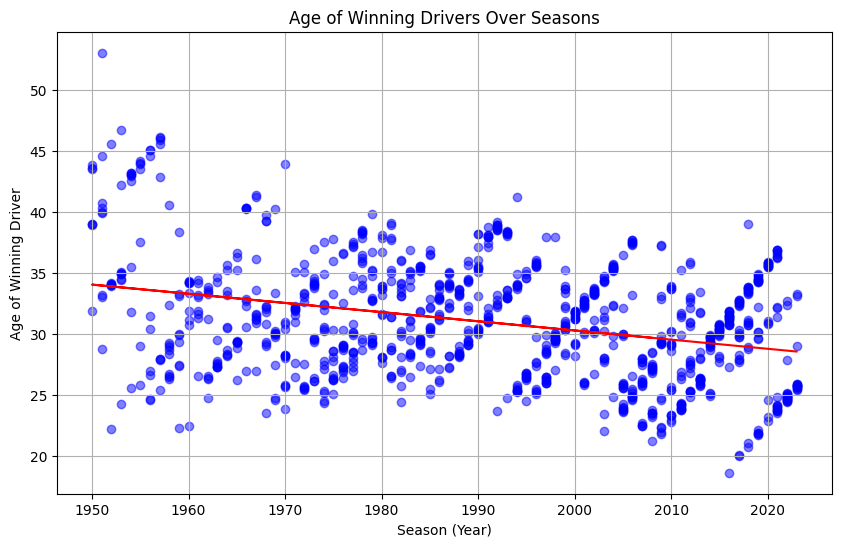

In [59]:
# Filtering the merged dataset to get only the winning drivers (1st position)
winning_drivers_data = merged_dataset[merged_dataset['positionOrder'] == 1]

# Ensuring that the date and dob columns are in datetime format
winning_drivers_data['date'] = pd.to_datetime(winning_drivers_data['date'])
winning_drivers_data['dob'] = pd.to_datetime(winning_drivers_data['dob'])

# Calculating the age of the winning drivers at the time of their wins
winning_drivers_data['age_at_win'] = (winning_drivers_data['date'] - winning_drivers_data['dob']).dt.days / 365.25

# Creating the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(winning_drivers_data['year'], winning_drivers_data['age_at_win'], alpha=0.5, color='blue')

# Adding a trend line
z = np.polyfit(winning_drivers_data['year'], winning_drivers_data['age_at_win'], 1)
p = np.poly1d(z)
plt.plot(winning_drivers_data['year'], p(winning_drivers_data['year']), color='red')

# Adding titles and labels
plt.title('Age of Winning Drivers Over Seasons')
plt.xlabel('Season (Year)')
plt.ylabel('Age of Winning Driver')
plt.grid(True)
plt.show()


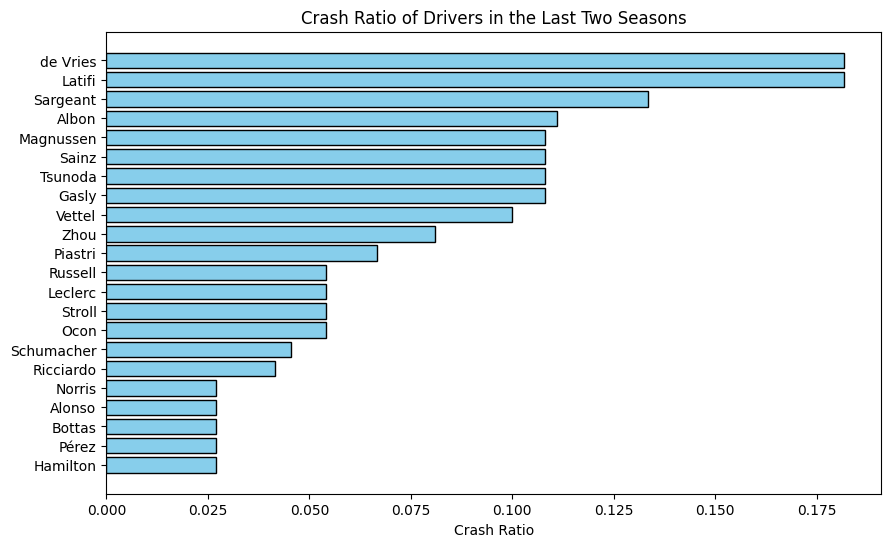

In [60]:
# Filtering the merged dataset for the last two seasons
recent_seasons_data = merged_dataset[merged_dataset['year'].isin([2022, 2023])]

# Identifying the rows where a crash occurred; assuming statuses containing "Accident" or "Collision" indicate a crash
crash_data = recent_seasons_data[recent_seasons_data['status'].str.contains('Accident|Collision', na=False)]

# Grouping by driver and calculating the crash ratio
total_races_by_driver = recent_seasons_data['driverId'].value_counts()
total_crashes_by_driver = crash_data['driverId'].value_counts()
crash_ratio_by_driver = (total_crashes_by_driver / total_races_by_driver).dropna()

# Merging with driver names
crash_ratio_by_driver = crash_ratio_by_driver.reset_index()
crash_ratio_by_driver.columns = ['driverId', 'crash_ratio']
crash_ratio_by_driver = crash_ratio_by_driver.merge(merged_dataset[['driverId', 'surname']], on='driverId').drop_duplicates()

# Sorting drivers by crash ratio in descending order to get the drivers with highest crash ratios first
crash_ratio_by_driver = crash_ratio_by_driver.sort_values(by='crash_ratio', ascending=False)

# Creating the bar chart
plt.figure(figsize=(10, 6))
plt.barh(crash_ratio_by_driver['surname'], crash_ratio_by_driver['crash_ratio'], color='skyblue', edgecolor='black')
plt.xlabel('Crash Ratio')
plt.title('Crash Ratio of Drivers in the Last Two Seasons')
plt.gca().invert_yaxis()  # Inverting y-axis to display the driver with the highest crash ratio at the top
plt.show()
